In [1]:
# Spatial analysis
import xarray as xr  # For working with NetCDF files
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualizations
from scipy import stats  # For statistical analysis

In [2]:
file_path = 'C:/Users/signs/Desktop/precipitation/IMD_Reshma/rainfall_1901_2022.nc'  
dataset = xr.open_dataset(file_path)

In [3]:
print(dataset)

<xarray.Dataset>
Dimensions:  (time: 44560, lon: 135, lat: 129)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-01-02 ... 2022-12-31
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
Data variables:
    rf       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.4
    history:      Wed Feb 15 15:46:28 2023: cdo mergetime rainfall_1901_2020....
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...


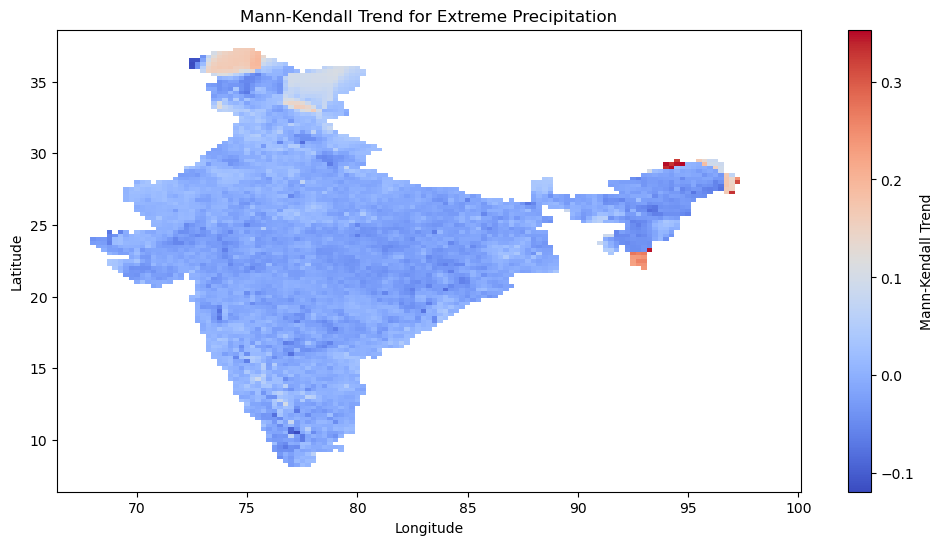

In [5]:
import xarray as xr
import numpy as np
from scipy.stats import kendalltau
import matplotlib.pyplot as plt


# Define a function to calculate extreme rainfall indices
def calculate_extreme_indices(dataset):
    # Example: calculate total precipitation over a threshold (e.g., 95th percentile)
    threshold = dataset['rf'].quantile(0.95, dim='time')
    extreme_precipitation = dataset['rf'] - threshold
    return extreme_precipitation

# Calculate extreme rainfall indices
extreme_precipitation = calculate_extreme_indices(dataset)

# Analyze trends using the Mann-Kendall test
def mann_kendall_trend_test(data):
    trend, _ = kendalltau(range(len(data)), data)
    return trend

# Calculate trends for each grid point
trends = xr.apply_ufunc(mann_kendall_trend_test, extreme_precipitation, input_core_dims=[['time']], vectorize=True)

# Create spatial maps of trends
def plot_trends(trends, lon, lat):
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(lon, lat, trends, cmap='coolwarm', shading='auto')
    plt.colorbar(label='Mann-Kendall Trend')
    plt.title('Mann-Kendall Trend for Extreme Precipitation')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('trends_map.png')
    plt.show()

# Assuming lon and lat are extracted from your dataset
lon = dataset['lon'].values
lat = dataset['lat'].values

# Plot spatial maps of trends
plot_trends(trends, lon, lat)

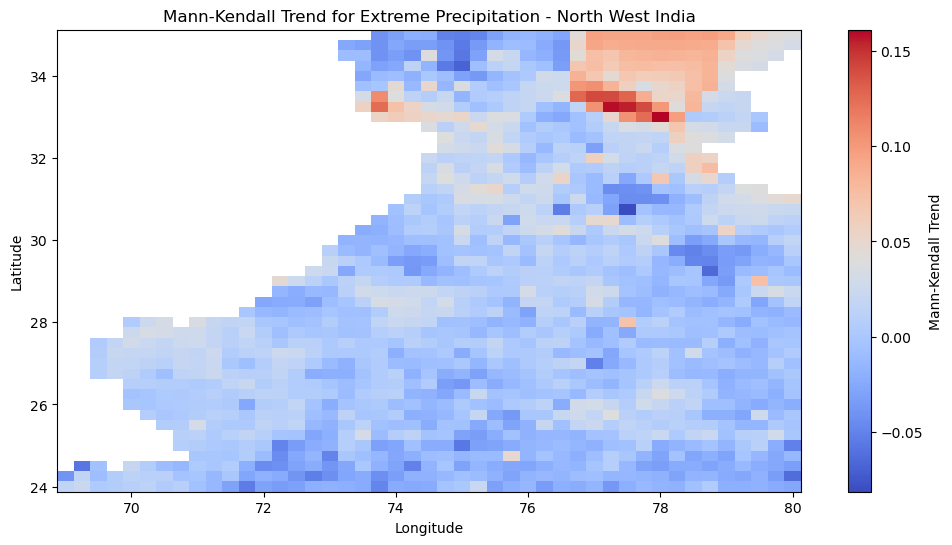

In [6]:
# NorthWest India
%matplotlib inline
import matplotlib.pyplot as plt

# Define the region of interest (e.g., India)
# Adjust the latitude and longitude bounds accordingly
roi_lat_bounds = (24, 35)
roi_lon_bounds = (69, 80)

# Subset the data for the region of interest
roi_trends = trends.sel(lat=slice(*roi_lat_bounds), lon=slice(*roi_lon_bounds))

# Create a spatial map for the region of interest
plt.figure(figsize=(12, 6))
plt.pcolormesh(roi_trends.lon, roi_trends.lat, roi_trends, cmap='coolwarm', shading='auto')
plt.colorbar(label='Mann-Kendall Trend')
plt.title('Mann-Kendall Trend for Extreme Precipitation - North West India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('NWI.png')
plt.show()

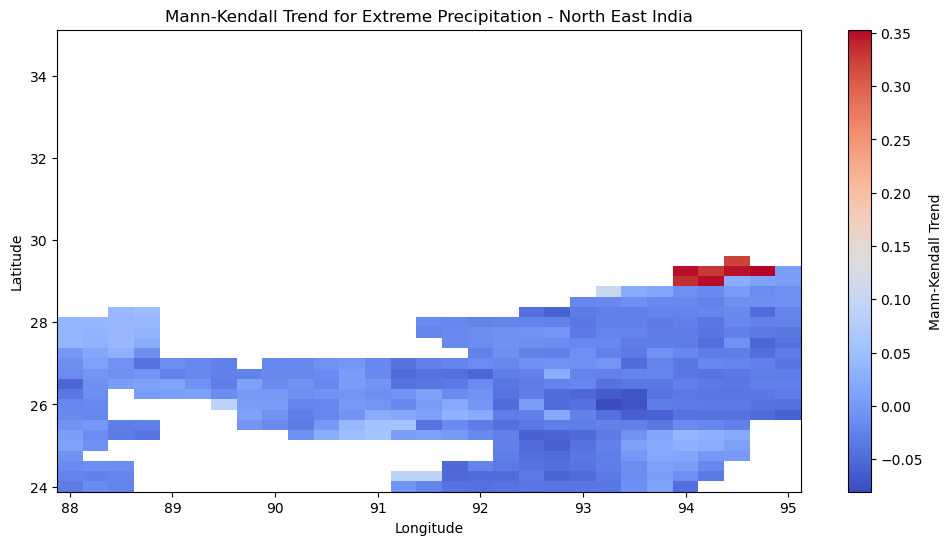

In [7]:
# NorthEast India

# Define the region of interest (e.g., India)
# Adjust the latitude and longitude bounds accordingly
roi_lat_bounds = (24, 35)
roi_lon_bounds = (88, 95)

# Subset the data for the region of interest
roi_trends = trends.sel(lat=slice(*roi_lat_bounds), lon=slice(*roi_lon_bounds))

# Create a spatial map for the region of interest
plt.figure(figsize=(12, 6))
plt.pcolormesh(roi_trends.lon, roi_trends.lat, roi_trends, cmap='coolwarm', shading='auto')
plt.colorbar(label='Mann-Kendall Trend')
plt.title('Mann-Kendall Trend for Extreme Precipitation - North East India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('NEI.png')
plt.show()

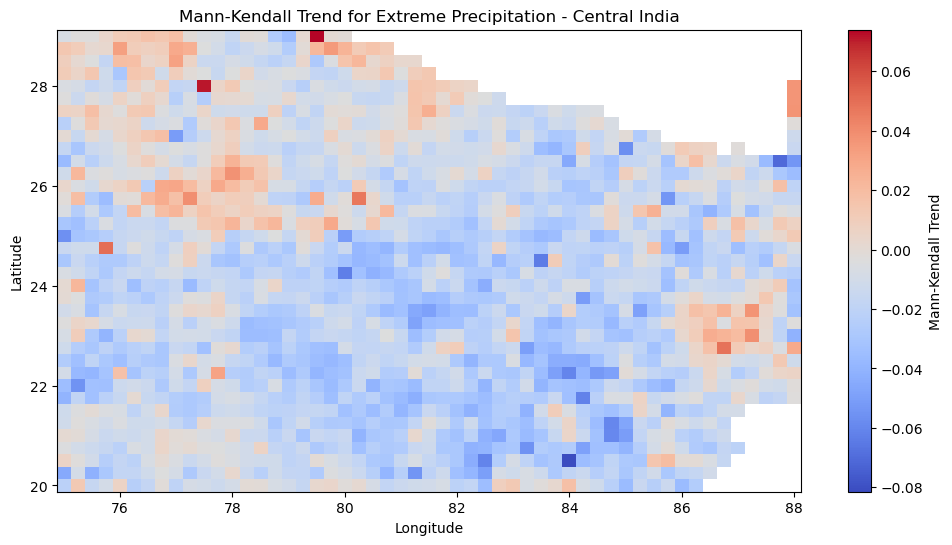

In [8]:
# Central India

# Define the region of interest (e.g., India)
# Adjust the latitude and longitude bounds accordingly
roi_lat_bounds = (20, 29)
roi_lon_bounds = (75, 88)

# Subset the data for the region of interest
roi_trends = trends.sel(lat=slice(*roi_lat_bounds), lon=slice(*roi_lon_bounds))

# Create a spatial map for the region of interest
plt.figure(figsize=(12, 6))
plt.pcolormesh(roi_trends.lon, roi_trends.lat, roi_trends, cmap='coolwarm', shading='auto')
plt.colorbar(label='Mann-Kendall Trend')
plt.title('Mann-Kendall Trend for Extreme Precipitation - Central India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Central_India.png')
plt.show()

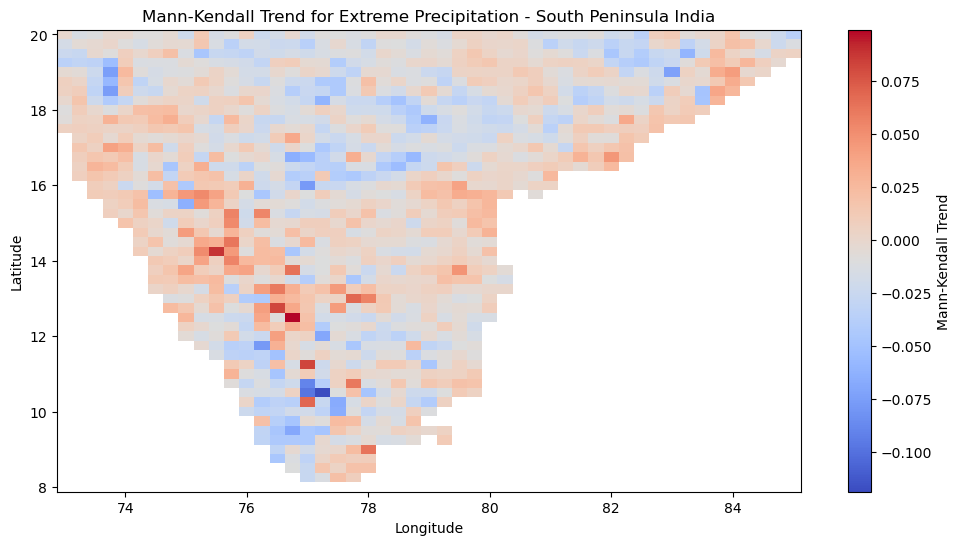

In [9]:
# South Peninsula India

# Define the region of interest (e.g., India)
# Adjust the latitude and longitude bounds accordingly
roi_lat_bounds = (8, 20)
roi_lon_bounds = (73, 85)

# Subset the data for the region of interest
roi_trends = trends.sel(lat=slice(*roi_lat_bounds), lon=slice(*roi_lon_bounds))

# Create a spatial map for the region of interest
plt.figure(figsize=(12, 6))
plt.pcolormesh(roi_trends.lon, roi_trends.lat, roi_trends, cmap='coolwarm', shading='auto')
plt.colorbar(label='Mann-Kendall Trend')
plt.title('Mann-Kendall Trend for Extreme Precipitation - South Peninsula India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('SPIN')
plt.show()

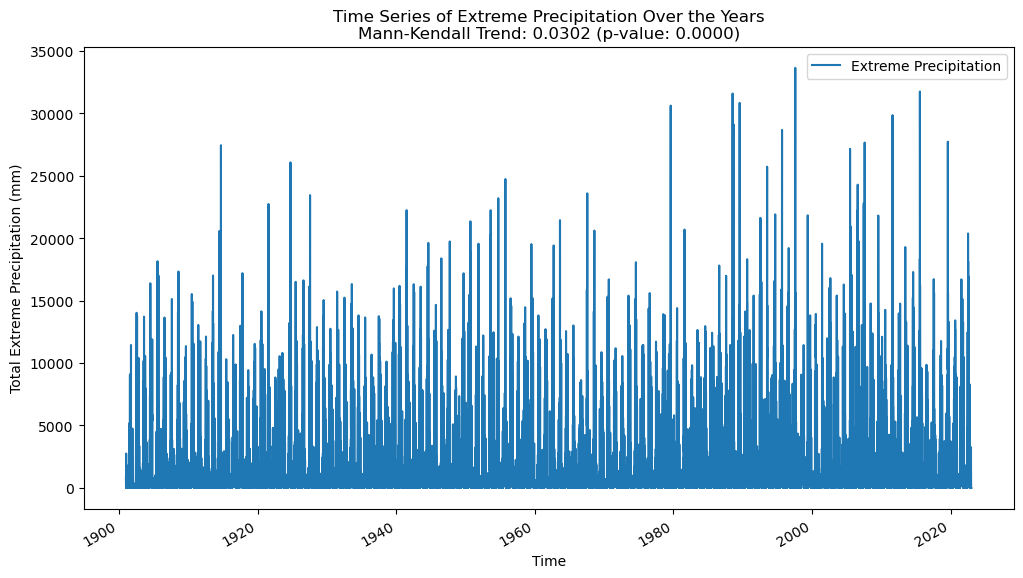

In [10]:
#Temporal Analysis
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Load your dataset
# Assuming dataset is your xarray dataset
# Example: dataset = xr.open_dataset('your_data.nc')

def calculate_extreme_indices(dataset):
    threshold = dataset['rf'].quantile(0.99, dim='time')
    extreme_precipitation = xr.where(dataset['rf'] > threshold, dataset['rf'] - threshold, 0)
    return extreme_precipitation

# Calculate extreme rainfall indices
extreme_precipitation = calculate_extreme_indices(dataset)

# Sum of extreme precipitation for each day
extreme_precipitation_sum = extreme_precipitation.sum(dim=['lat', 'lon'])

# Analyze trends using the Mann-Kendall test
def mann_kendall_trend_test(data):
    # Check for constant values
    if np.all(data == data[0]):
        return 0.0, np.nan  # Return 0 trend for constant data

    # Check for NaN values
    if np.isnan(data).any():
        return np.nan, np.nan  # Return NaN for data with NaN values

    trend, p_value = kendalltau(range(len(data)), data)
    return trend, p_value


# Calculate trends for the time series
trend, p_value = mann_kendall_trend_test(extreme_precipitation_sum)

# Plot the time series with the trend
plt.figure(figsize=(12, 6))
extreme_precipitation_sum.plot(label='Extreme Precipitation')
plt.title(f'Time Series of Extreme Precipitation Over the Years\nMann-Kendall Trend: {trend:.4f} (p-value: {p_value:.4f})')
plt.xlabel('Time')
plt.ylabel('Total Extreme Precipitation (mm)')
plt.legend()
plt.savefig('Temporal.png')
plt.show()